# 长期价值投资数据监测

In [1]:
#imports

import yfinance as yf
import pandas as pd
import datetime as dt
import seaborn as sns
import kingquant as gd
from  matplotlib import pyplot as plt

#init
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, 
            rc={'figure.figsize':(15,10)})
#pd.options.display.float_format = '{:,.2f}'.format

#parameters
ticker_list=['META','MSFT','AAPL','GOOG','AMZN','PFE','MCD',
'NVDA','0700.HK','ADBE','MO','ADSK','ASML','BRK-B',
'GS','ISRG','KO','LVMUY','2318.HK','TSM','ADBE','MCO','BABA','BHP'

]



In [2]:
print('This notebook was refreshed at %s'%(dt.datetime.now()))

This notebook was refreshed at 2022-09-15 11:05:09.995944


## 美国国债收益率监测

In [3]:
df_rate_10y=pd.DataFrame()
data=yf.download(['^IRX','^FVX','^TNX','^TYX'],progress=False)

df_rate_10y=data.loc[dt.date.today()-dt.timedelta(days=365*10):]['Close']
df_rate_10y.columns=['5 Years','13 Weeks','10 Years','30 Years']

In [4]:
s=df_rate_10y.tail(1).style.format('{:.3f}%')
s

,5 Years,13 Weeks,10 Years,30 Years
Date,,,,
2022-09-14 00:00:00,3.595%,3.128%,3.412%,3.469%


Text(0.5, 1.0, '10 years trend of treasury yield')

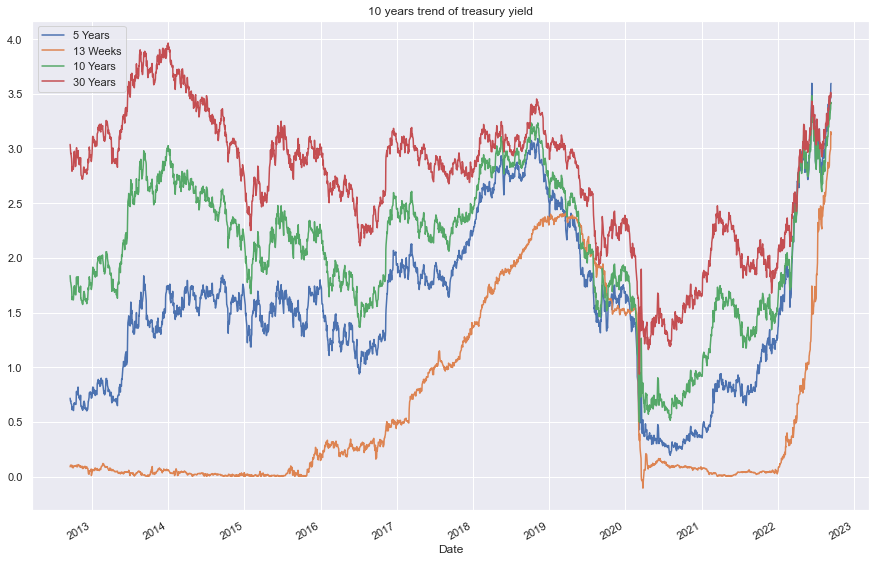

In [5]:
df_rate_10y.plot()
plt.title("10 years trend of treasury yield")

Text(0.5, 1.0, '1 year trend of treasury yield')

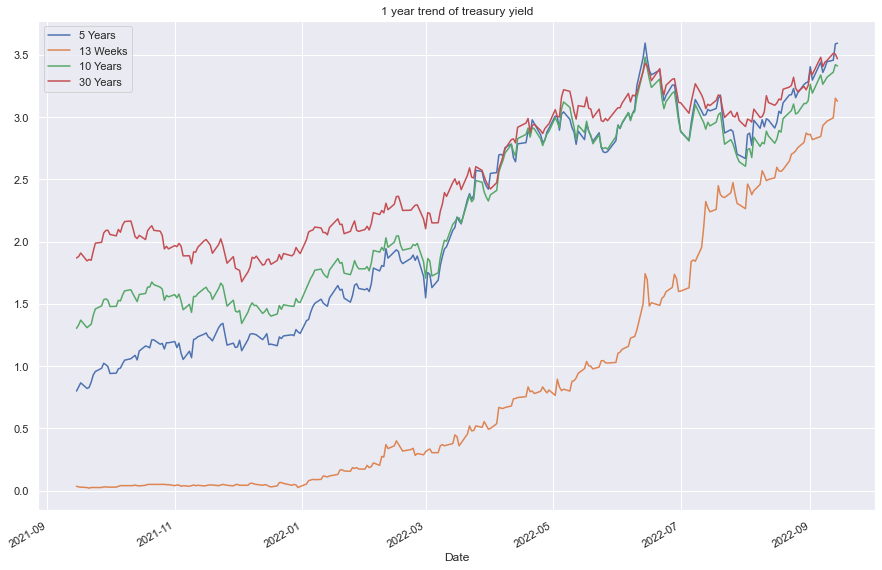

In [6]:
df_rate_1y=pd.DataFrame()
data=yf.download(['^IRX','^FVX','^TNX','^TYX'],progress=False)

df_rate_1y=data.loc[dt.date.today()-dt.timedelta(days=365):]['Close']
df_rate_1y.columns=['5 Years','13 Weeks','10 Years','30 Years']
df_rate_1y.plot()
plt.title("1 year trend of treasury yield")

## 股市和国债利率的相关度

## 跟踪公司数据监控

In [7]:

ticker_list=list(dict.fromkeys(ticker_list))
df_port=pd.DataFrame()
df_port['ticker']=ticker_list
df_port['weight']=0

In [8]:
df_stock=gd.get_port_holding_info(df_port)
df_stock.to_csv('../data/share/value_port_info.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

/Users/weiqinchen/Documents/Python/skydog/notebooks/kingquant.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_stock['ratecode']=df_stock['financialCurrency']+'-USD'
/Users/weiqinchen/Documents/Python/skydog/notebooks/kingquant.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df_stock['ratecode2']=df_stock['currency']+'-USD'
/Users/weiqinchen/Documents/Python/skydog/notebooks/kingquant.py:29: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which h

In [9]:
df_stock=pd.read_csv('../data/share/value_port_info.csv')
df_metric=gd.get_port_holding_metric(df_stock)

In [10]:
df_metric.reindex(columns=['ticker','eps_ttm','price','1w_chg_pct','drawdown','target_price','roe','cf_margin','net_margin','pe_ttm','pe_fwd']
).sort_values(by='pe_fwd').style.format(precision=2,
        formatter={'drawdown':'{:.2f}%',
                    '1w_chg_pct':'{:.2f}%',
                    'revenue_growth':'{:.2f}%',
                    'cash_return_rate':'{:.2f}%',
                    'roe':'{:.2f}%',
                    'gross_margin':'{:.2f}%',
                    'net_margin':'{:.2f}%',
                    'cf_margin':'{:.2f}%',
        
         })

,ticker,eps_ttm,price,1w_chg_pct,drawdown,target_price,roe,cf_margin,net_margin,pe_ttm,pe_fwd
5,PFE,5.14,46.15,0.04%,-22.87%,56.55,37.40%,31.06%,28.94%,8.98,0.82
21,BABA,8.95,88.92,-1.85%,-49.96%,151.67,4.38%,16.73%,7.30%,9.93,8.03
10,MO,0.98,41.76,-7.10%,-24.74%,48.25,391.08%,39.98%,8.45%,42.61,8.20
14,GS,44.28,327.26,-1.00%,-20.85%,380.00,14.56%,2.35%,32.82%,7.39,8.51
18,2318.HK,9.40,45.90,0.66%,-33.77%,73.60,11.04%,21.73%,7.60%,4.88,11.47
0,META,12.57,151.47,-5.56%,-59.77%,217.00,25.48%,48.96%,28.16%,12.05,13.77
19,TSM,3.73,79.66,-0.36%,-43.37%,122.81,nan%,nan%,40.59%,21.36,17.47
3,GOOG,5.40,105.87,-4.17%,-29.75%,150.00,29.22%,34.16%,25.89%,19.61,17.91
13,BRK-B,4.97,278.42,-0.93%,-22.57%,356.50,2.69%,12.17%,4.04%,56.02,18.34
7,NVDA,3.73,131.28,-4.27%,-60.63%,205.00,34.41%,25.40%,26.03%,35.21,20.97


In [11]:
# df_metric.reindex(columns=['ticker','eps_ttm','price','1w_chg_pct','drawdown','target_price','roe','cf_margin','net_margin','pe_ttm','pe_fwd']
# ).to_csv('test.csv')